In [1]:
#for beep on completion
import winsound
duration = 1500  # milliseconds
freq = 400  # Hz

#winsound.Beep(freq, duration)

In [2]:
import lucem_illud_2020
import os 
import pandas as pd
import pickle

C:\Users\acmel\Anaconda3\lib\site-packages\spacy\util.py:271: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.0). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [3]:
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [4]:
from nltk import sent_tokenize, word_tokenize, pos_tag
import spacy
nlp = spacy.load("en_core_web_sm")
#nlp = spacy.load("en")
import numpy as np
import matplotlib

C:\Users\acmel\Anaconda3\lib\site-packages\spacy\util.py:271: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.0). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.font_manager as font_manager
print(matplotlib.__version__)

3.2.1


In [6]:
nlp = spacy.load("en_core_web_sm")
#nlp = spacy.load("en")

### UPDATING Corpus1f.csv FILE AND DATAFRAME ###

#concattenating the csv files in the corpus
import glob
path = r'C:\Users\acmel\OneDrive - The University of Chicago\Documents\Computational Content Analysis\SOCI_FINAL\Corpus1a'
all_files = glob.iglob(os.path.join(path, "*.csv")) 
df = pd.concat((pd.read_csv(f).assign(filename = f.replace(path+'\\', "")) for f in all_files), ignore_index=True).drop_duplicates(keep='last')

#removing the $ signs from the Reward column
df['Reward'] = df['Reward'].map(lambda x: x.lstrip(r'd\$'))

#saving the corpus csv 
df.to_csv(r'C:\Users\acmel\Anaconda3\Code\Corpus1f.csv', index = 0)
df

In [7]:
df = pd.read_csv(r'C:\Users\acmel\Anaconda3\Code\Corpus1f.csv')

#converting decimals into floats to be sorted properly
df.Reward = df.Reward.astype(float)

df

,Requester,Title,HITs,Reward,filename
0,Yixin Nie,Inference from the Text!,76,0.12,3-09_9-40.csv
1,Sharmishtha Gupta,Watch TV clips and see if it's changing to/fro...,2,0.05,3-09_9-40.csv
2,Panel,Extract purchased items from a shopping receip...,175,0.01,3-09_9-40.csv
3,Panel,Extract purchased items from a shopping receipt,"3,327",0.08,3-09_9-40.csv
4,Panel,Extract purchased items from a shopping receip...,99,0.01,3-09_9-40.csv
...,...,...,...,...,...
71003,LSAN,Answer a survey about faces and emotions.,1,0.35,3-22_4-00.csv
71004,Clic2Buy,Sélectionner les meilleures informations pour ...,30,0.05,3-22_4-00.csv
71005,Clic2Buy,Sélectionner les meilleures informations pour ...,54,0.04,3-22_4-00.csv
71006,Clic2Buy,Sélectionner les meilleures informations pour ...,52,0.03,3-22_4-00.csv


In [8]:
#ascending sorted
df = df.sort_values("Reward", ascending=[False])
df

,Requester,Title,HITs,Reward,filename
50154,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_3-00.csv
46777,ShengZhi,Write what you would say for transport card to...,1,25.00,3-18_8-00.csv
51490,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_5-00.csv
52157,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_6-00.csv
45344,ShengZhi,Write what you would say for transport card to...,1,25.00,3-18_5-00.csv
...,...,...,...,...,...
59209,Gregg Sparkman,Missed Participants. (Only for Workers who wer...,1,0.01,3-20_6-00.csv
59211,Stanford HCI,HIT to repay,2,0.01,3-20_6-00.csv
59212,UserLook,Makeup HIT for UserLook,1,0.01,3-20_6-00.csv
7270,Brian Hamman,Transcribe <classification> part numbers,12,0.01,3-11_5-00.csv


## Top Rewards -- 0.99-1.00

#filtering for Top 1Percentile Rewards 
df = df[df.Reward > np.percentile(df.Reward,99)]
df

#topRewards dataframe
df_topRewards = df
df_topRewards['sentences'] = df_topRewards['Title'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])
df_topRewards.index = range(len(df_topRewards) - 1, -1,-1) #Reindex to make things nice in the future
df_topRewards.to_csv(r'C:\Users\acmel\Anaconda3\Code\Corpus1f_TopRewards_99.csv', encoding='utf-8', index=False)
df = df_topRewards
df

## POS Tagging

In [17]:
import pandas as pd
from nltk import sent_tokenize, word_tokenize, pos_tag
import spacy
nlp = spacy.load("en_core_web_sm")
#nlp = spacy.load("en")
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.font_manager as font_manager
print(matplotlib.__version__)

3.2.1


In [11]:
df = pd.read_csv(r'C:\Users\acmel\Anaconda3\Code\Corpus1f_TopRewards_99.csv')
df

,Requester,Title,HITs,Reward,filename,sentences
0,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_3-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for..."
1,ShengZhi,Write what you would say for transport card to...,1,25.00,3-18_8-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for..."
2,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_5-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for..."
3,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_6-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for..."
4,ShengZhi,Write what you would say for transport card to...,1,25.00,3-18_5-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for..."
...,...,...,...,...,...,...
388,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_1-00.csv,"[['Upload', '25-minute', 'screencast', 'of', '..."
389,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_3-20.csv,"[['Upload', '25-minute', 'screencast', 'of', '..."
390,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_12-30.csv,"[['Upload', '25-minute', 'screencast', 'of', '..."
391,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_10-00.csv,"[['Upload', '25-minute', 'screencast', 'of', '..."


In [12]:
#tokenizing and normalizing texts
df['tokenized_text'] = df['Title'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
df['normalized_text'] = df['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

winsound.Beep(freq, duration)

df

,Requester,Title,HITs,Reward,filename,sentences,tokenized_text,normalized_text
0,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_3-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]"
1,ShengZhi,Write what you would say for transport card to...,1,25.00,3-18_8-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]"
2,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_5-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]"
3,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_6-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]"
4,ShengZhi,Write what you would say for transport card to...,1,25.00,3-18_5-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]"
...,...,...,...,...,...,...,...,...
388,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_1-00.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin..."
389,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_3-20.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin..."
390,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_12-30.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin..."
391,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_10-00.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin..."


In [13]:
#tokenizing+normalizing sentences
df['tokenized_sents'] = df['Title'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
df['normalized_sents'] = df['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

winsound.Beep(freq, duration)

df

,Requester,Title,HITs,Reward,filename,sentences,tokenized_text,normalized_text,tokenized_sents,normalized_sents
0,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_3-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]","[[Write, what, you, would, say, for, transport...","[[write, transport, card, phone]]"
1,ShengZhi,Write what you would say for transport card to...,1,25.00,3-18_8-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]","[[Write, what, you, would, say, for, transport...","[[write, transport, card, phone]]"
2,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_5-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]","[[Write, what, you, would, say, for, transport...","[[write, transport, card, phone]]"
3,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_6-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]","[[Write, what, you, would, say, for, transport...","[[write, transport, card, phone]]"
4,ShengZhi,Write what you would say for transport card to...,1,25.00,3-18_5-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]","[[Write, what, you, would, say, for, transport...","[[write, transport, card, phone]]"
...,...,...,...,...,...,...,...,...,...,...
388,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_1-00.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin...","[[Upload, 25-minute, screencast, of, a, websit...","[[upload, 25-minute, screencast, website, busi..."
389,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_3-20.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin...","[[Upload, 25-minute, screencast, of, a, websit...","[[upload, 25-minute, screencast, website, busi..."
390,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_12-30.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin...","[[Upload, 25-minute, screencast, of, a, websit...","[[upload, 25-minute, screencast, website, busi..."
391,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_10-00.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin...","[[Upload, 25-minute, screencast, of, a, websit...","[[upload, 25-minute, screencast, website, busi..."


In [15]:
#removing all non-alphanumeric characters from normalized_sents
comDFc = df
comDFc.Text = comDFc.normalized_sents.str.replace('[^a-zA-Z]', ' ')
comDFc.replace(' ', np.nan, inplace=True)
comDFc.dropna(inplace=True)
comDFc

,Requester,Title,HITs,Reward,filename,sentences,tokenized_text,normalized_text,tokenized_sents,normalized_sents
0,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_3-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]","[[Write, what, you, would, say, for, transport...","[[write, transport, card, phone]]"
1,ShengZhi,Write what you would say for transport card to...,1,25.00,3-18_8-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]","[[Write, what, you, would, say, for, transport...","[[write, transport, card, phone]]"
2,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_5-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]","[[Write, what, you, would, say, for, transport...","[[write, transport, card, phone]]"
3,ShengZhi,Write what you would say for transport card to...,1,25.00,3-19_6-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]","[[Write, what, you, would, say, for, transport...","[[write, transport, card, phone]]"
4,ShengZhi,Write what you would say for transport card to...,1,25.00,3-18_5-00.csv,"[['Write', 'what', 'you', 'would', 'say', 'for...","[Write, what, you, would, say, for, transport,...","[write, transport, card, phone]","[[Write, what, you, would, say, for, transport...","[[write, transport, card, phone]]"
...,...,...,...,...,...,...,...,...,...,...
388,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_1-00.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin...","[[Upload, 25-minute, screencast, of, a, websit...","[[upload, 25-minute, screencast, website, busi..."
389,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_3-20.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin...","[[Upload, 25-minute, screencast, of, a, websit...","[[upload, 25-minute, screencast, website, busi..."
390,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_12-30.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin...","[[Upload, 25-minute, screencast, of, a, websit...","[[upload, 25-minute, screencast, website, busi..."
391,UserBob,Upload 25-minute screencast of a website (Busi...,1,11.75,3-13_10-00.csv,"[['Upload', '25-minute', 'screencast', 'of', '...","[Upload, 25-minute, screencast, of, a, website...","[upload, 25-minute, screencast, website, busin...","[[Upload, 25-minute, screencast, of, a, websit...","[[upload, 25-minute, screencast, website, busi..."


In [19]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [21]:
comDFc['normalized_sents']

0                      [[write, transport, card, phone]]
1                      [[write, transport, card, phone]]
2                      [[write, transport, card, phone]]
3                      [[write, transport, card, phone]]
4                      [[write, transport, card, phone]]
                             ...                        
388    [[upload, 25-minute, screencast, website, busi...
389    [[upload, 25-minute, screencast, website, busi...
390    [[upload, 25-minute, screencast, website, busi...
391    [[upload, 25-minute, screencast, website, busi...
392    [[upload, 25-minute, screencast, website, busi...
Name: normalized_sents, Length: 393, dtype: object

In [24]:
comDFc['sentences'] = comDFc['Title'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])

comDFc['POS_sents'] = comDFc['sentences'].apply(lambda x: tag_sents_pos(x))
comDFc.to_csv(r'C:\Users\acmel\Anaconda3\Code\Corpus1f_comPOS.csv', encoding='UTF-8', index=False)

comDFc['POS_sents']

0      [[(Write, VB), (what, WP), (you, PRP), (would,...
1      [[(Write, VB), (what, WP), (you, PRP), (would,...
2      [[(Write, VB), (what, WP), (you, PRP), (would,...
3      [[(Write, VB), (what, WP), (you, PRP), (would,...
4      [[(Write, VB), (what, WP), (you, PRP), (would,...
                             ...                        
388    [[(Upload, NNP), (25-minute, CD), (screencast,...
389    [[(Upload, NNP), (25-minute, CD), (screencast,...
390    [[(Upload, NNP), (25-minute, CD), (screencast,...
391    [[(Upload, NNP), (25-minute, CD), (screencast,...
392    [[(Upload, NNP), (25-minute, CD), (screencast,...
Name: POS_sents, Length: 393, dtype: object

df['POS_sents'] = df['sentences'].apply(lambda x: tag_sents_pos(x))
df.to_csv(r'C:\Users\acmel\Anaconda3\Code\Corpus1f_TopRewards_99.csv', encoding='UTF-8', index=False)

df['POS_sents']

In [60]:
### DEFINING MODIFIERS TEST FUNCTION ###

#Word = "word"
#-------------------------------------#

def mod_test(word):


    NTarget = 'NN'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("NN", NResults)     
    #-------------------------------------#

    NTarget = 'NNS'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("NNS", NResults)     
    #-------------------------------------#

    NTarget = 'NNP'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("NNP", NResults)     
    #-------------------------------------#

    NTarget = 'NNPS'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("NNPS", NResults)     
    #-------------------------------------#

    NTarget = 'JJ'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("JJ", NResults)     
    #-------------------------------------#

    NTarget = 'JJR'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("JJR", NResults)     
    #-------------------------------------#

    NTarget = 'JJS'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("JJS", NResults)     
    #-------------------------------------#

    NTarget = 'VB'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("VB", NResults)     
    #-------------------------------------#

    NTarget = 'VBD'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("VBD", NResults)     
    #-------------------------------------#

    NTarget = 'VBG'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("VBG", NResults)     
    #-------------------------------------#

    NTarget = 'VBN'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("VBN", NResults)     
    #-------------------------------------#

    NTarget = 'VBP'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("VBP", NResults)     
    #-------------------------------------#

    NTarget = 'VBZ'
    NResults = set()
    for entry in comDFc['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue

    print("VBZ", NResults)

# Nouns (NN singular or mass)

In [27]:
#counting the number of NN (nouns)
countTarget = 'NN'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsNN = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)[:20]
sortedTargetsNN #[:20]

[('DANISH', 101),
 ('매우높음', 34),
 ('screencast', 13),
 ('website', 13),
 ('Business', 13),
 ('owner', 13),
 ('laptop', 13),
 ('Compensation', 10),
 ('access', 10),
 ('Thumb', 10),
 ('church', 8),
 ('sermon', 8),
 ('video', 8),
 ('clip', 8),
 ('Study', 8),
 ('transport', 7),
 ('card', 7),
 ('top', 7),
 ('up', 7),
 ('phone', 7)]

In [28]:
#saving the list of tuples as a .txt
import pickle
with open ("C1f_sortedTargetsNN_TR99.txt", "wb") as fp:
    pickle.dump(sortedTargetsNN, fp)


In [32]:
#saving the list of keywords as a .txt

reduced_sortedTargetsNN = sortedTargetsNN #[:20]
NN_keywordsList = [(a) for a,b in reduced_sortedTargetsNN]
#NN_keywordsList

#saving the list as a .txt
import pickle
with open ("C1f_NN_keywordsList_TR99.txt", "wb") as fp:
    pickle.dump(NN_keywordsList, fp)

<BarContainer object of 20 artists>

<Figure size 432x288 with 0 Axes>

C:\Users\acmel\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acmel\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acmel\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acmel\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acmel\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\acmel\AppData\Roaming\Python

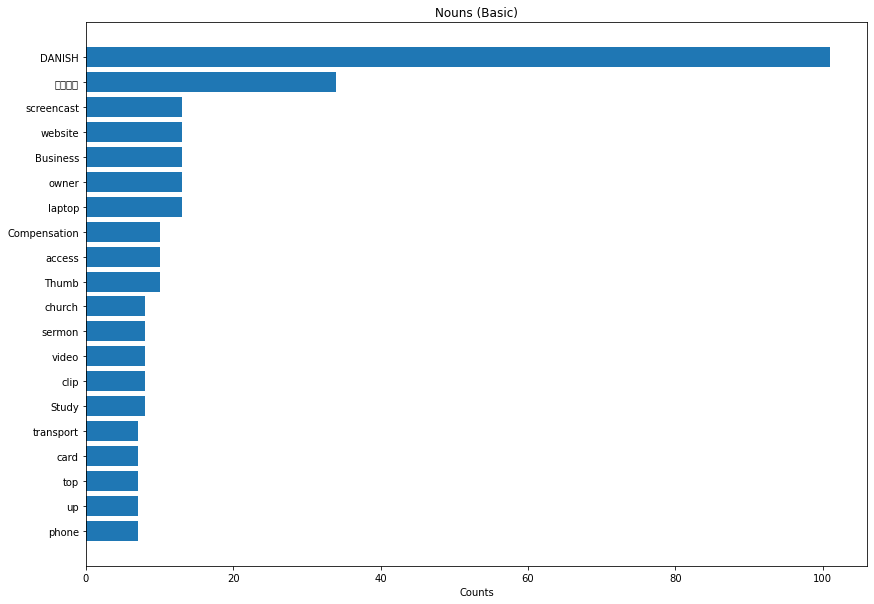

In [30]:
NN = sortedTargetsNN#[:20]

fig = plt.figure()
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Nouns (Basic)')


plt.barh(*zip(*NN))

### NN Modifiers

In [33]:
#opening
with open("C1f_sortedTargetsNN_TR99.txt", "rb") as fp:
    sortedTargetsNN_TR99 = pickle.load(fp)
    
#sortedTargetsNN_TR99

In [75]:
NNdf = pd.DataFrame(sortedTargetsNN_TR99)
NNdf.columns=['word','count']

NNdf

,word,count
0,DANISH,101
1,매우높음,34
2,screencast,13
3,website,13
4,Business,13
5,owner,13
6,laptop,13
7,Compensation,10
8,access,10
9,Thumb,10


In [61]:
Word = "DANISH"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [135]:
Word = "매우높음"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [130]:
Word = "screencast"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [43]:
Word = "website"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [44]:
Word = "Business"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [62]:
Word = "owner"
mod_test(Word)

NN {'Business'}
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [46]:
Word = "laptop"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [47]:
Word = "Compensation"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [48]:
Word = "access"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ {'early'}
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [49]:
Word = "Thumb"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [50]:
Word = "church"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [51]:
Word = "sermon"
mod_test(Word)

NN {'church'}
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [52]:
Word = "video"
mod_test(Word)

NN {'sermon'}
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [53]:
Word = "clip"
mod_test(Word)

NN {'video'}
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [54]:
Word = "Study"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [55]:
Word = "transport"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [56]:
Word = "card"
mod_test(Word)

NN {'transport'}
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [63]:
Word = "top"
mod_test(Word)

NN {'card'}
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [64]:
Word = "up"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [65]:
Word = "phone"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


# Nouns (NNS plural)

In [67]:
#counting the number of NNS (plural)
countTarget = 'NNS'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsNNS = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsNNS#[:20]

[('speakers', 304),
 ('recordings', 304),
 ('minutes', 10),
 ('Rules', 10),
 ('data', 3),
 ('A2HU1HGGYUO3X6', 2)]

In [69]:
#saving the list as a .txt
import pickle
with open ("C1f_sortedTargetsNNS_TR99.txt", "wb") as fp:
    pickle.dump(sortedTargetsNNS, fp)

In [70]:
reduced_sortedTargetsNNS = sortedTargetsNNS#[:20]
NNS_keywordsList = [(a) for a,b in reduced_sortedTargetsNNS]
NNS_keywordsList

['speakers', 'recordings', 'minutes', 'Rules', 'data', 'A2HU1HGGYUO3X6']

In [71]:
#saving the list as a .txt
import pickle
with open ("C1f_NNS_keywordsList_TR99.txt", "wb") as fp:
    pickle.dump(NNS_keywordsList, fp)

<BarContainer object of 6 artists>

<Figure size 432x288 with 0 Axes>

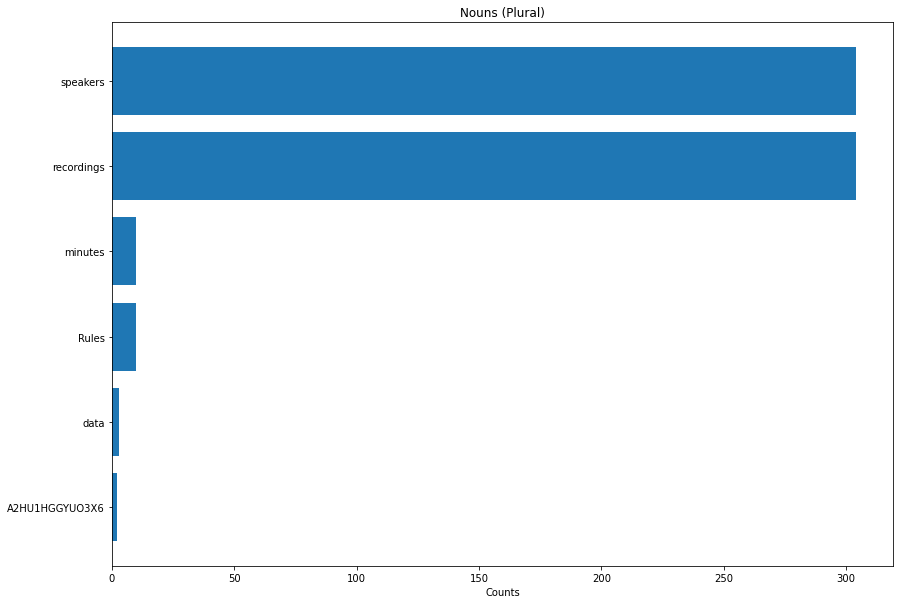

In [72]:
NNS = sortedTargetsNNS#[:20]

fig = plt.figure()
fig, ax = plt.subplots(figsize=(14, 10))


ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Nouns (Plural)')


plt.barh(*zip(*NNS))

### NNS Modifiers

In [73]:
#opening
with open("C1f_sortedTargetsNNS_TR99.txt", "rb") as fp:
    sortedTargetsNNS_TR99 = pickle.load(fp)
    
#sortedTargetsNNS_TR99

In [74]:
NNSdf = pd.DataFrame(sortedTargetsNNS_TR99)
NNSdf.columns=['word','count']

NNSdf

,word,count
0,speakers,304
1,recordings,304
2,minutes,10
3,Rules,10
4,data,3
5,A2HU1HGGYUO3X6,2


In [76]:
Word = "speakers"
mod_test(Word)

NN {'DANISH'}
NNS set()
NNP set()
NNPS set()
JJ {'Swedish', 'NORWEGIAN'}
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [77]:
Word = "recordings"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ {'short'}
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [78]:
Word = "minutes"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [79]:
Word = "Rules"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [80]:
Word = "data"
mod_test(Word)

NN {'handwriting'}
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [81]:
Word = "A2HU1HGGYUO3X6"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


# NNP (proper singular)

In [83]:
#counting the number of NNP (proper singular)
countTarget = 'NNP'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsNNP = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsNNP#[:22]


[('품질', 34),
 ('평가', 34),
 ('소요시간', 34),
 ('매우쉬움', 34),
 ('Social', 18),
 ('Upload', 13),
 ('Chrome', 13),
 ('Qual', 10),
 ('Qualification', 10),
 ('Norms', 10),
 ('Gambling', 8),
 ('Online', 8),
 ('Gaming', 8),
 ('iPad', 3),
 ('Apple', 3),
 ('Pencil', 3),
 ('Game', 2),
 ('Design', 2)]

In [84]:
#saving the list as a .txt
import pickle
with open ("C1f_sortedTargetsNNP_TR99.txt", "wb") as fp:
    pickle.dump(sortedTargetsNNP, fp)

In [85]:
reduced_sortedTargetsNNP = sortedTargetsNNP#[:22]
NNP_keywordsList = [(a) for a,b in reduced_sortedTargetsNNP]
NNP_keywordsList

['품질',
 '평가',
 '소요시간',
 '매우쉬움',
 'Social',
 'Upload',
 'Chrome',
 'Qual',
 'Qualification',
 'Norms',
 'Gambling',
 'Online',
 'Gaming',
 'iPad',
 'Apple',
 'Pencil',
 'Game',
 'Design']

In [86]:
#saving the list as a .txt
import pickle
with open ("C1f_NNP_keywordsList_TR99.txt", "wb") as fp:
    pickle.dump(NNP_keywordsList, fp)

<BarContainer object of 18 artists>

<Figure size 432x288 with 0 Axes>

C:\Users\acmel\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acmel\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acmel\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acmel\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acmel\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acmel\AppData\Roaming\Pyth

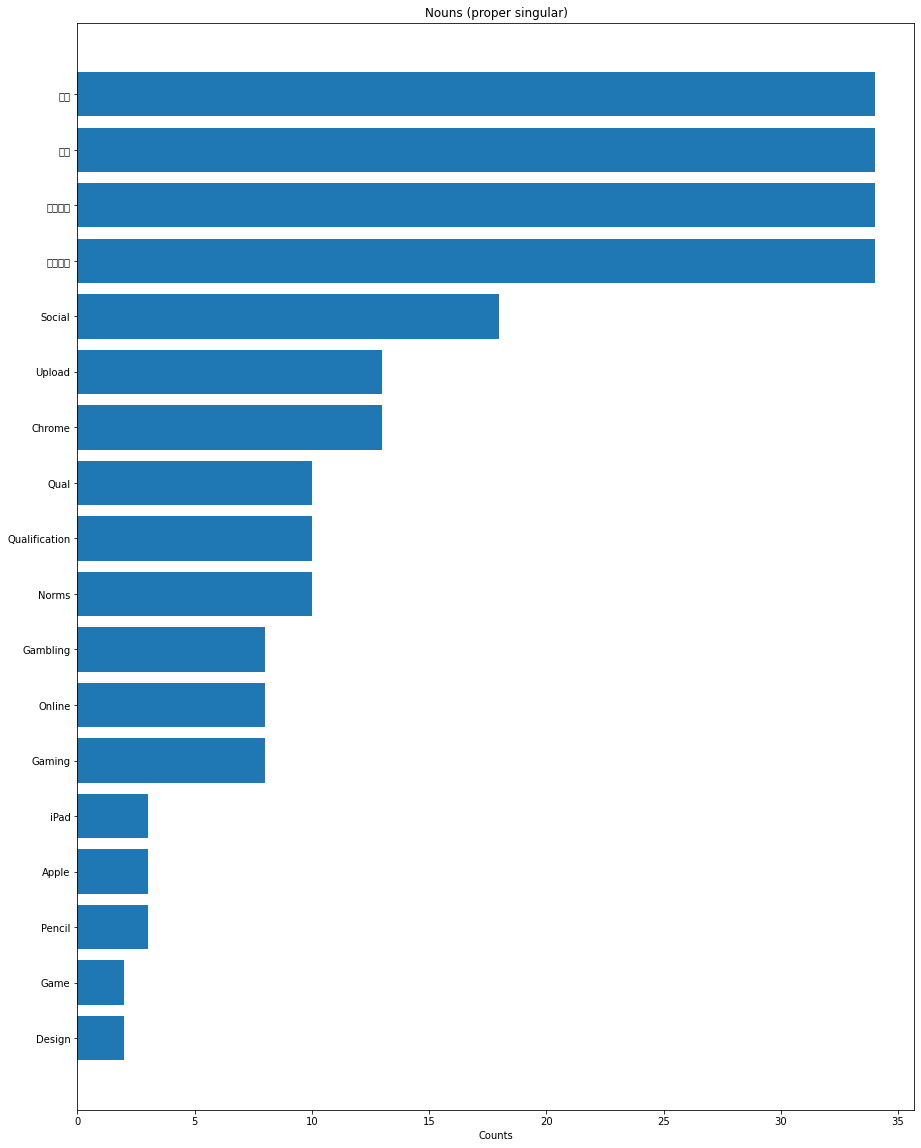

In [87]:
NNP = sortedTargetsNNP#[:20]

fig = plt.figure()
fig, ax = plt.subplots(figsize=(15, 20))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Nouns (proper singular)')


plt.barh(*zip(*NNP))

### NNP Modifiers

In [88]:
#opening
with open("C1f_sortedTargetsNNP_TR99.txt", "rb") as fp:
    sortedTargetsNNP_TR99 = pickle.load(fp)
    
#sortedTargetsNNP_TR99

In [89]:
NNPdf = pd.DataFrame(sortedTargetsNNP_TR99)
NNPdf.columns=['word','count']

NNPdf

,word,count
0,품질,34
1,평가,34
2,소요시간,34
3,매우쉬움,34
4,Social,18
5,Upload,13
6,Chrome,13
7,Qual,10
8,Qualification,10
9,Norms,10


In [90]:
Word = "품질"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [92]:
Word = "평가"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [93]:
Word = "소요시간"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [94]:
Word = "매우쉬움"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [95]:
Word = "Social"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [96]:
Word = "Upload"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [97]:
Word = "Chrome"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [98]:
Word = "Qual"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [100]:
Word = "Qualification"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [101]:
Word = "Norms"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [102]:
Word = "Gambling"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [103]:
Word = "Online"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [104]:
Word = "Gaming"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [110]:
Word = "iPad"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [111]:
Word = "Apple"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [112]:
Word = "Pencil"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [113]:
Word = "Game"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [114]:
Word = "Design"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


# NNPS (proper plural)

In [115]:
#counting the number of NNPS (proper plural)
countTarget = 'NNPS'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsNNPS = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsNNPS#[:100]

[('Effects', 2)]

In [116]:
#saving the list as a .txt
import pickle
with open ("C1f_sortedTargetsNNPS_TR99.txt", "wb") as fp:
    pickle.dump(sortedTargetsNNPS, fp)

In [117]:
reduced_sortedTargetsNNPS = sortedTargetsNNPS#[:20]
NNPS_keywordsList = [(a) for a,b in reduced_sortedTargetsNNPS]
NNPS_keywordsList


['Effects']

In [118]:
#saving the list as a .txt
import pickle
with open ("C1f_NNPS_keywordsList_TR99.txt", "wb") as fp:
    pickle.dump(NNPS_keywordsList, fp)

<BarContainer object of 1 artists>

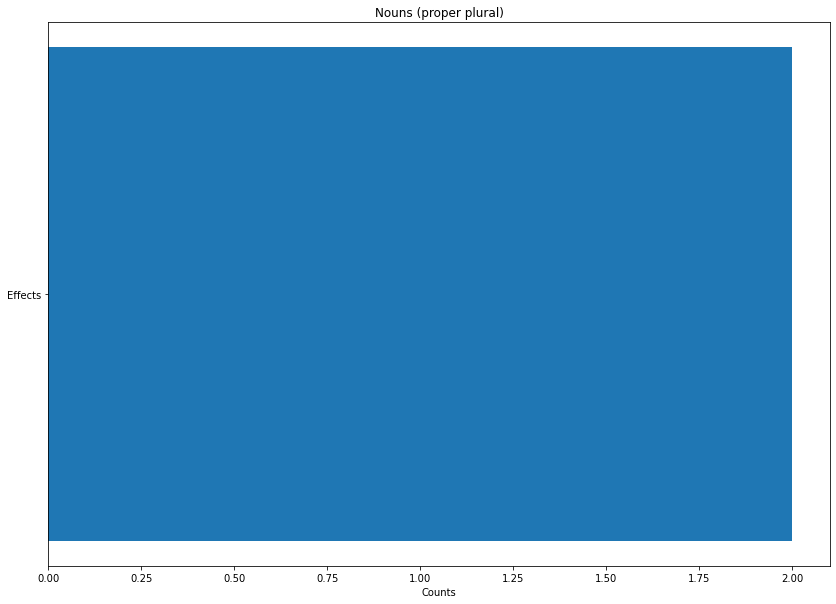

In [119]:
NNPS = sortedTargetsNNPS

ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Nouns (proper plural)')


plt.barh(*zip(*NNPS))

## NNPS modifiers

In [122]:
#opening
with open("C1f_sortedTargetsNNPS_TR99.txt", "rb") as fp:
    sortedTargetsNNPS_TR99 = pickle.load(fp)
    
#sortedTargetsNNPS_TR99

In [123]:
NNPSdf = pd.DataFrame(sortedTargetsNNPS_TR99)
NNPSdf.columns=['word','count']

NNPSdf

,word,count
0,Effects,2


In [124]:
Word = "Effects	"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


# Verbs (base form)

In [125]:
#counting the number of verbs (base form)
countTarget = 'VB'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsVB = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsVB#[:20]

[('Make', 304), ('Break', 10), ('Write', 8), ('say', 8), ('Collect', 3)]

In [126]:
#saving the list as a .txt
import pickle
with open ("C1f_sortedTargetsVB_TR99.txt", "wb") as fp:
    pickle.dump(sortedTargetsVB, fp)

In [127]:
reduced_sortedTargetsVB = sortedTargetsVB#[:20]
VB_keywordsList = [(a) for a,b in reduced_sortedTargetsVB]
VB_keywordsList

['Make', 'Break', 'Write', 'say', 'Collect']

In [128]:
#saving the list as a .txt
import pickle
with open ("C1f_VB_keywordsList_TR99.txt", "wb") as fp:
    pickle.dump(VB_keywordsList, fp)

<BarContainer object of 5 artists>

<Figure size 432x288 with 0 Axes>

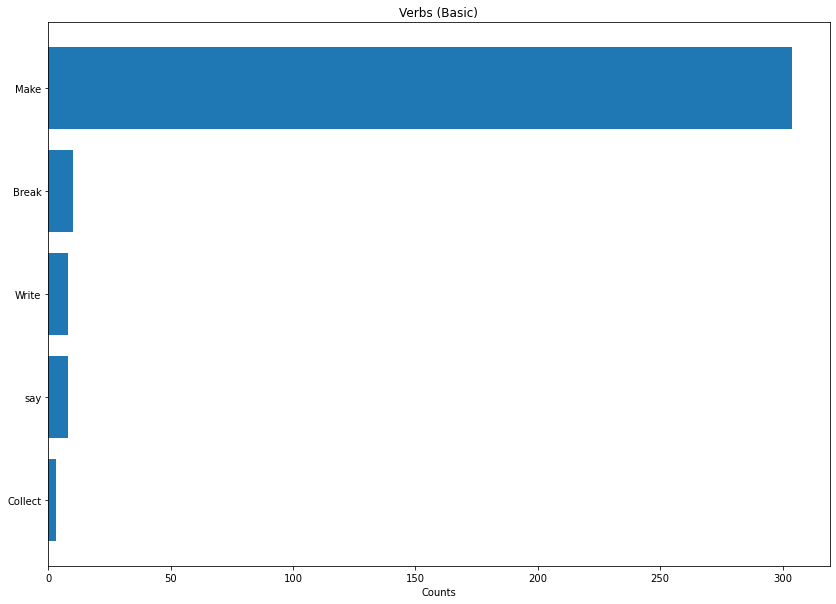

In [129]:
VB = sortedTargetsVB#[:20]

fig = plt.figure()
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Verbs (Basic)')


plt.barh(*zip(*VB))

### VB Modifiers

In [130]:
#opening
with open("C1f_sortedTargetsVB_TR99.txt", "rb") as fp:
    sortedTargetsVB_TR99 = pickle.load(fp)
    
#sortedTargetsVB_TR99

In [131]:
VBdf = pd.DataFrame(sortedTargetsVB_TR99)
VBdf.columns=['word','count']

VBdf

,word,count
0,Make,304
1,Break,10
2,Write,8
3,say,8
4,Collect,3


In [132]:
Word = "Make"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [133]:
Word = "Break"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [134]:
Word = "Write"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [135]:
Word = "say"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


In [136]:
Word = "Collect"
mod_test(Word)

NN set()
NNS set()
NNP set()
NNPS set()
JJ set()
JJR set()
JJS set()
VB set()
VBD set()
VBG set()
VBN set()
VBP set()
VBZ set()


# Verbs (gerund or present participle)

In [138]:
#counting the number of verbs (gerund or present participle)
countTarget = 'VBG'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsVBG = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsVBG#[:20]

[('using', 3)]

In [139]:
#saving the list as a .txt
import pickle
with open ("C1f_sortedTargetsVBG_TR99.txt", "wb") as fp:
    pickle.dump(sortedTargetsVBG, fp)

In [140]:
reduced_sortedTargetsVBG = sortedTargetsVBG#[:20]
VBG_keywordsList = [(a) for a,b in reduced_sortedTargetsVBG]
VBG_keywordsList

['using']

In [141]:
#saving the list as a .txt
import pickle
with open ("C1f_VBG_keywordsList_TR99.txt", "wb") as fp:
    pickle.dump(VBG_keywordsList, fp)

<BarContainer object of 1 artists>

<Figure size 432x288 with 0 Axes>

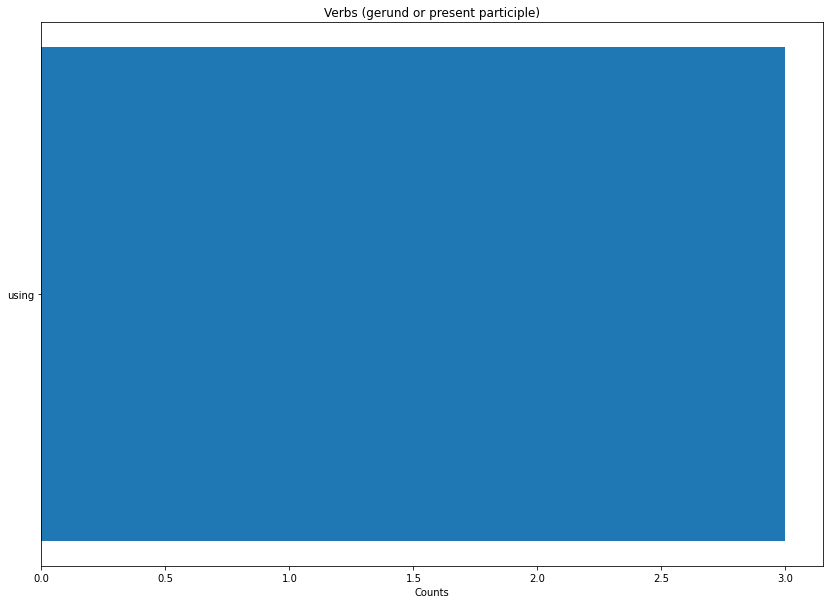

In [142]:
VBG = sortedTargetsVBG#[:20]

fig = plt.figure()
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Verbs (gerund or present participle)')


plt.barh(*zip(*VBG))

### VBG Modifiers

In [143]:
#opening
with open("C1f_sortedTargetsVBG_TR99.txt", "rb") as fp:
    sortedTargetsVBG_TR99 = pickle.load(fp)
    
VBdf = pd.DataFrame(sortedTargetsVBG_TR99)
VBdf.columns=['word','count']

VBdf

,word,count
0,Make,304
1,Break,10
2,Write,8
3,say,8
4,Collect,3


### JJ (adjective)

In [147]:
#counting the number of JJ (adjective)
countTarget = 'JJ'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsJJ = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsJJ[:20]

[('complete', 451),
 ('mental', 260),
 ('human', 176),
 ('related', 175),
 ('final', 171),
 ('compensated', 90),
 ('previous', 90),
 ('ethnic', 63),
 ('racial', 63),
 ('participate', 21),
 ('new', 21),
 ('academic', 21),
 ('online', 15),
 ('eligible', 14),
 ('short', 13),
 ('cognitive', 10),
 ('perceptual', 6),
 ('romantic', 6),
 ('assign', 5),
 ('simple', 5)]

In [118]:
#saving the list as a .txt
import pickle
with open ("sortedTargetsJJ.txt", "wb") as fp:
    pickle.dump(sortedTargetsJJ, fp)

In [119]:
reduced_sortedTargetsJJ = sortedTargetsJJ[:20]
JJ_keywordsList = [(a) for a,b in reduced_sortedTargetsJJ]
JJ_keywordsList

['complete',
 'mental',
 'human',
 'related',
 'final',
 'compensated',
 'previous',
 'ethnic',
 'racial',
 'participate',
 'new',
 'academic',
 'online',
 'eligible',
 'short',
 'cognitive',
 'perceptual',
 'romantic',
 'assign',
 'simple']

In [120]:
#saving the list as a .txt
import pickle
with open ("JJ_keywordsList.txt", "wb") as fp:
    pickle.dump(JJ_keywordsList, fp)

<BarContainer object of 20 artists>

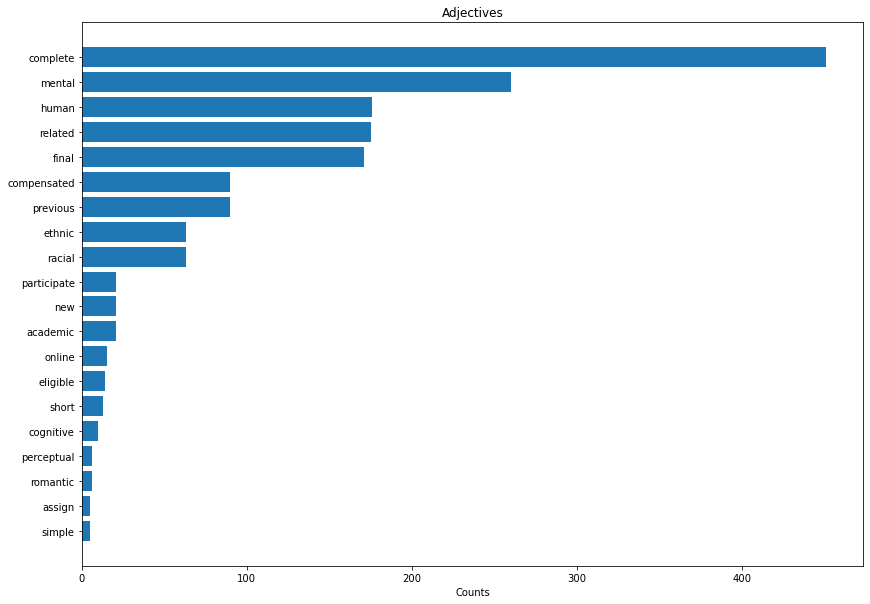

In [121]:
JJ = sortedTargetsJJ[:20]

ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Adjectives')


plt.barh(*zip(*JJ))

# Adjectives (JJR comparative)

In [122]:
#counting the number of 
countTarget = 'JJR'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsJJR = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsJJR[:20]

[('older', 175), ('deeper', 2)]

In [123]:
#saving the list as a .txt
import pickle
with open ("sortedTargetsJJR.txt", "wb") as fp:
    pickle.dump(sortedTargetsJJR, fp)

In [124]:
reduced_sortedTargetsJJR = sortedTargetsJJR[:20]
JJR_keywordsList = [(a) for a,b in reduced_sortedTargetsJJR]
JJR_keywordsList

['older', 'deeper']

In [125]:
#saving the list as a .txt
import pickle
with open ("JJR_keywordsList.txt", "wb") as fp:
    pickle.dump(JJR_keywordsList, fp)

<BarContainer object of 2 artists>

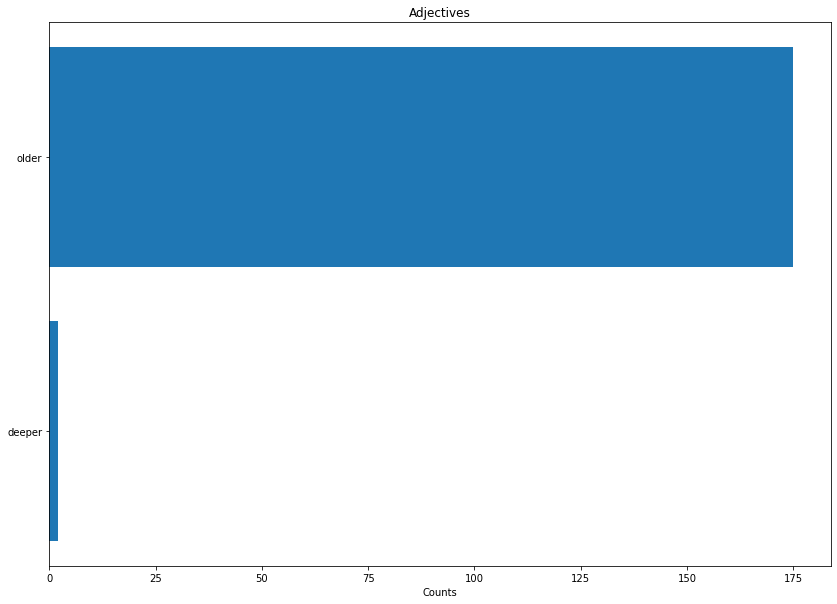

In [126]:
JJR = sortedTargetsJJR[:20]

ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Adjectives')


plt.barh(*zip(*JJR))

# Adjective (JJS superlative)

In [127]:
#counting the number of 
countTarget = 'JJS'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsJJS = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsJJS[:20]

[]

In [128]:
#saving the list as a .txt
import pickle
with open ("sortedTargetsJJS.txt", "wb") as fp:
    pickle.dump(sortedTargetsJJS, fp)

In [129]:
reduced_sortedTargetsJJS = sortedTargetsJJS[:20]
JJS_keywordsList = [(a) for a,b in reduced_sortedTargetsJJS]
JJS_keywordsList

[]

In [130]:
#saving the list as a .txt
import pickle
with open ("JJS_keywordsList.txt", "wb") as fp:
    pickle.dump(JJS_keywordsList, fp)

TypeError: barh() missing 2 required positional arguments: 'y' and 'width'

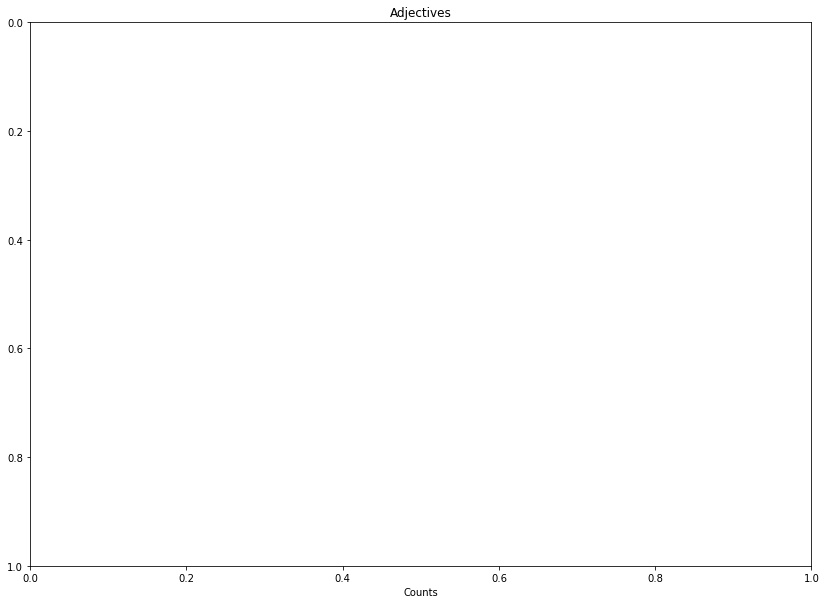

In [148]:
JJS = sortedTargetsJJS[:20]

ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Adjectives')


plt.barh(*zip(*JJS))

# Adverb (RB basic)

In [149]:
#counting the number of 
countTarget = 'RB'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsRB = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsRB[:21]

[('approximately', 177),
 ('ago', 6),
 ('quickly', 3),
 ('successfully', 2),
 ('carefully', 1),
 ('closely', 1),
 ('perfectly', 1),
 ('previously', 1),
 ('additionally', 1)]

In [150]:
#saving the list as a .txt
import pickle
with open ("sortedTargetsRB.txt", "wb") as fp:
    pickle.dump(sortedTargetsRB, fp)

In [151]:
reduced_sortedTargetsRB = sortedTargetsRB[:21]
RB_keywordsList = [(a) for a,b in reduced_sortedTargetsRB]
RB_keywordsList

['approximately',
 'ago',
 'quickly',
 'successfully',
 'carefully',
 'closely',
 'perfectly',
 'previously',
 'additionally']

In [152]:
#saving the list as a .txt
import pickle
with open ("RB_keywordsList.txt", "wb") as fp:
    pickle.dump(RB_keywordsList, fp)

<BarContainer object of 9 artists>

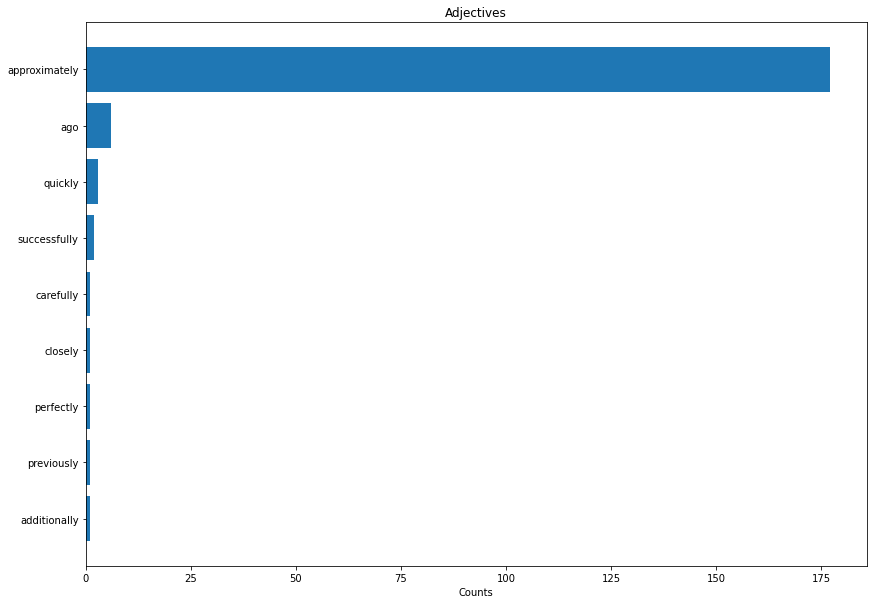

In [153]:
RB = sortedTargetsRB[:20]

ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Adjectives')


plt.barh(*zip(*RB))

# Adverb (RBR comparative)

In [154]:
#counting the number of 
countTarget = 'RBR'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsRBR = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsRBR[:20]

[('better', 21)]

In [155]:
#saving the list as a .txt
import pickle
with open ("sortedTargetsRBR.txt", "wb") as fp:
    pickle.dump(sortedTargetsRBR, fp)

In [156]:
reduced_sortedTargetsRBR = sortedTargetsRBR[:20]
RBR_keywordsList = [(a) for a,b in reduced_sortedTargetsRBR]
RBR_keywordsList

['better']

In [157]:
#saving the list as a .txt
import pickle
with open ("RBR_keywordsList.txt", "wb") as fp:
    pickle.dump(RBR_keywordsList, fp)

<BarContainer object of 1 artists>

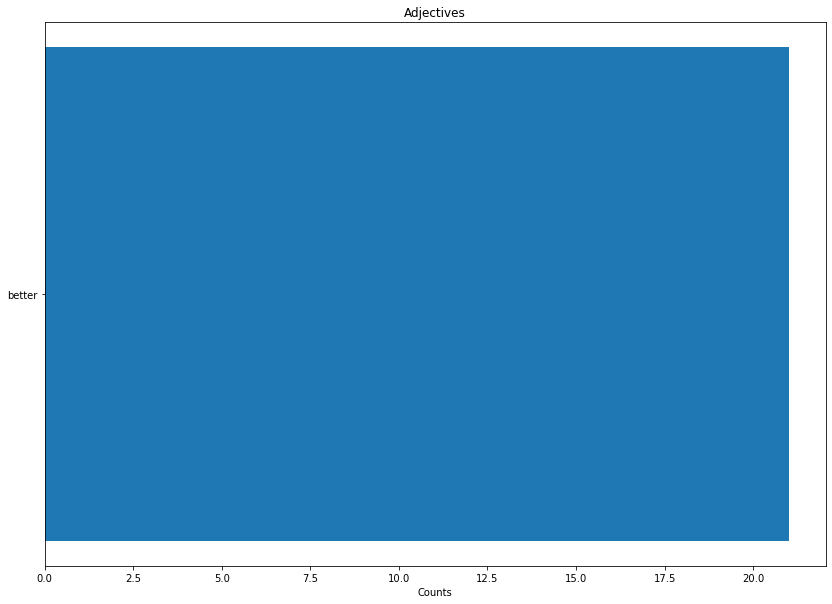

In [158]:
RBR = sortedTargetsRBR[:20]

ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Adjectives')


plt.barh(*zip(*RBR))

# Verbs (VBD past tense)

In [159]:
#counting the number of 
countTarget = 'VBD'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsVBD = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsVBD[:20]

[('assessed', 176),
 ('entered', 175),
 ('reviewed', 175),
 ('completed', 96),
 ('compensated', 85),
 ('hit', 52),
 ('paid', 23),
 ('invited', 21),
 ('required', 8),
 ('asked', 7),
 ('changed', 6),
 ('read', 4),
 ('ptsd', 2),
 ('crashed', 2),
 ('hosted', 1),
 ('mounted', 1),
 ('qualified', 1),
 ('rejected', 1),
 ('tempted', 1)]

In [160]:
#saving the list as a .txt
import pickle
with open ("sortedTargetsVBD.txt", "wb") as fp:
    pickle.dump(sortedTargetsVBD, fp)

In [161]:
reduced_sortedTargetsVBD = sortedTargetsVBD[:20]
VBD_keywordsList = [(a) for a,b in reduced_sortedTargetsVBD]
VBD_keywordsList

['assessed',
 'entered',
 'reviewed',
 'completed',
 'compensated',
 'hit',
 'paid',
 'invited',
 'required',
 'asked',
 'changed',
 'read',
 'ptsd',
 'crashed',
 'hosted',
 'mounted',
 'qualified',
 'rejected',
 'tempted']

In [162]:
#saving the list as a .txt
import pickle
with open ("VBD_keywordsList.txt", "wb") as fp:
    pickle.dump(VBD_keywordsList, fp)

<BarContainer object of 19 artists>

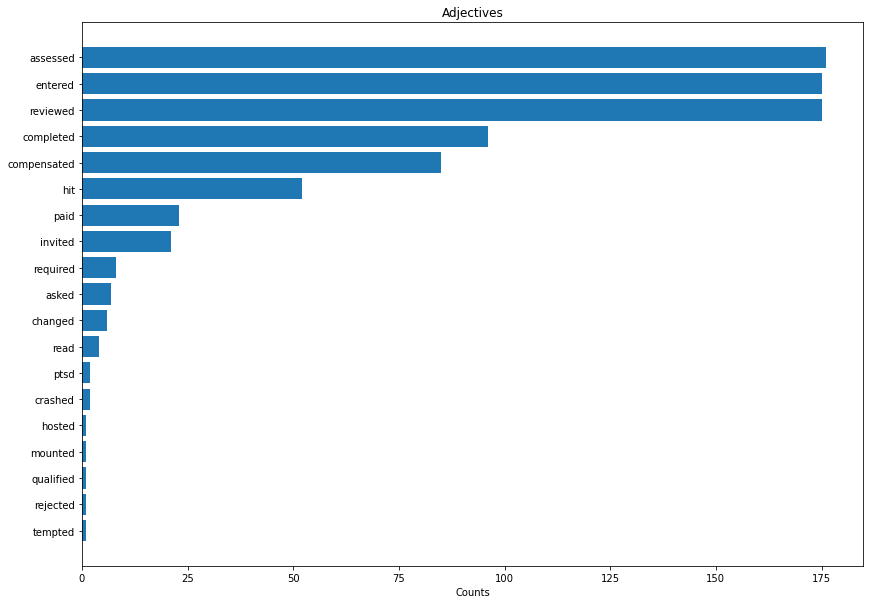

In [163]:
VBD = sortedTargetsVBD[:20]

ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Adjectives')


plt.barh(*zip(*VBD))

# Verbs (VBN past participle)

In [164]:
#counting the number of 
countTarget = 'VBN'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsVBN = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsVBN[:20]

[('hit', 4),
 ('augmented', 2),
 ('completed', 2),
 ('given', 1),
 ('attended', 1),
 ('required', 1),
 ('read', 1),
 ('asked', 1),
 ('based', 1),
 ('taken', 1),
 ('collected', 1),
 ('stored', 1),
 ('accompanied', 1)]

In [165]:
#saving the list as a .txt
import pickle
with open ("sortedTargetsVBN.txt", "wb") as fp:
    pickle.dump(sortedTargetsVBN, fp)

In [166]:
reduced_sortedTargetsVBN = sortedTargetsVBN[:20]
VBN_keywordsList = [(a) for a,b in reduced_sortedTargetsVBN]
VBN_keywordsList

['hit',
 'augmented',
 'completed',
 'given',
 'attended',
 'required',
 'read',
 'asked',
 'based',
 'taken',
 'collected',
 'stored',
 'accompanied']

In [167]:
#saving the list as a .txt
import pickle
with open ("VBN_keywordsList.txt", "wb") as fp:
    pickle.dump(VBN_keywordsList, fp)

<BarContainer object of 13 artists>

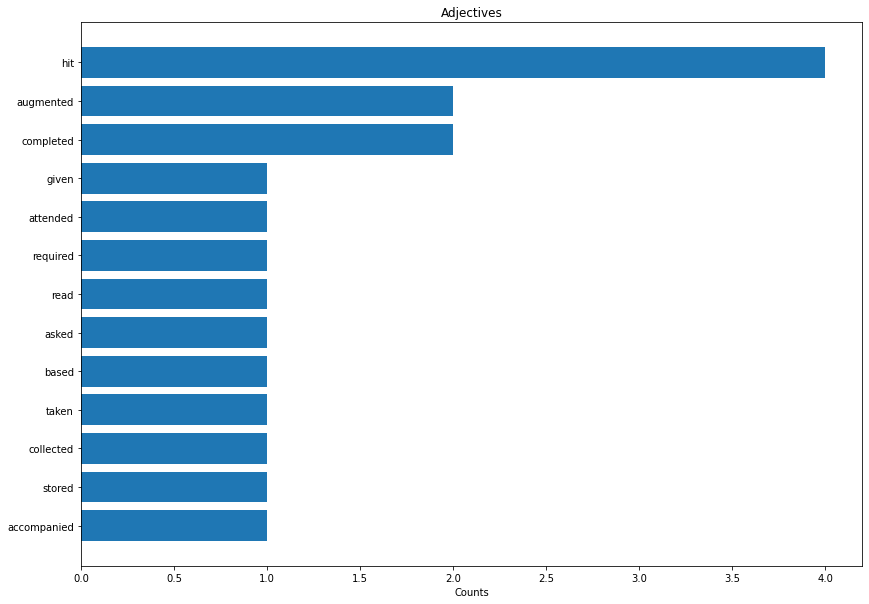

In [168]:
VBN = sortedTargetsVBN[:20]

ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Adjectives')


plt.barh(*zip(*VBN))

# Verbs (VBP non-3rd person singular present)

In [169]:
#counting the number of 
countTarget = 'VBP'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsVBP = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsVBP[:20]

[('study', 199),
 ('hour', 175),
 ('follow', 89),
 ('collect', 86),
 ('continue', 23),
 ('understand', 21),
 ('subtle', 21),
 ('answer', 13),
 ('survey', 12),
 ('spreadsheet', 5),
 ('read', 5),
 ('need', 4),
 ('tell', 4),
 ('require', 4),
 ('earn', 3),
 ('dive', 2),
 ('choose', 2),
 ('start', 2),
 ('qualify', 2),
 ('pose', 2)]

In [170]:
#saving the list as a .txt
import pickle
with open ("sortedTargetsVBP.txt", "wb") as fp:
    pickle.dump(sortedTargetsVBP, fp)

In [171]:
reduced_sortedTargetsVBP = sortedTargetsVBP[:20]
VBP_keywordsList = [(a) for a,b in reduced_sortedTargetsVBP]
VBP_keywordsList

['study',
 'hour',
 'follow',
 'collect',
 'continue',
 'understand',
 'subtle',
 'answer',
 'survey',
 'spreadsheet',
 'read',
 'need',
 'tell',
 'require',
 'earn',
 'dive',
 'choose',
 'start',
 'qualify',
 'pose']

In [172]:
#saving the list as a .txt
import pickle
with open ("VBP_keywordsList.txt", "wb") as fp:
    pickle.dump(VBP_keywordsList, fp)

<BarContainer object of 20 artists>

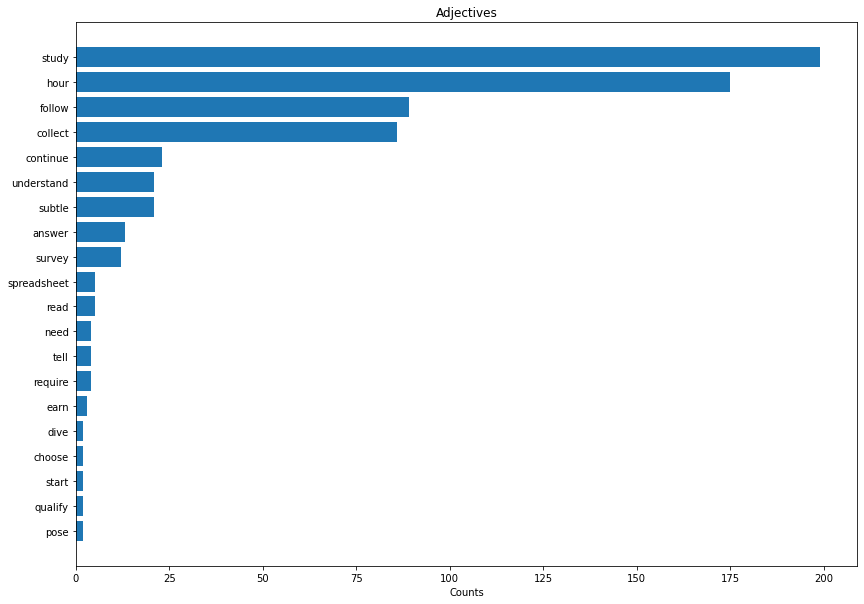

In [173]:
VBP = sortedTargetsVBP[:20]

ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Adjectives')


plt.barh(*zip(*VBP))

# Verbs (VBZ 3rd person singular present)

In [174]:
#counting the number of 
countTarget = 'VBZ'
targetCounts = {}
for entry in comDFc['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargetsVBZ = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargetsVBZ[:20]

[('aims', 21),
 ('thoughts', 9),
 ('queries', 5),
 ('experiences', 4),
 ('cwbym', 4),
 ('emotions', 2),
 ('takes', 2),
 ('identities', 2),
 ('requires', 1),
 ('minutes', 1),
 ('tests', 1),
 ('relates', 1),
 ('involves', 1),
 ('explains', 1),
 ('toddlers', 1),
 ('includes', 1)]

In [175]:
#saving the list as a .txt
import pickle
with open ("sortedTargetsVBZ.txt", "wb") as fp:
    pickle.dump(sortedTargetsVBZ, fp)

In [176]:
reduced_sortedTargetsVBZ = sortedTargetsVBZ[:20]
VBZ_keywordsList = [(a) for a,b in reduced_sortedTargetsVBZ]
VBZ_keywordsList

['aims',
 'thoughts',
 'queries',
 'experiences',
 'cwbym',
 'emotions',
 'takes',
 'identities',
 'requires',
 'minutes',
 'tests',
 'relates',
 'involves',
 'explains',
 'toddlers',
 'includes']

In [177]:
#saving the list as a .txt
import pickle
with open ("VBZ_keywordsList.txt", "wb") as fp:
    pickle.dump(VBZ_keywordsList, fp)

<BarContainer object of 16 artists>

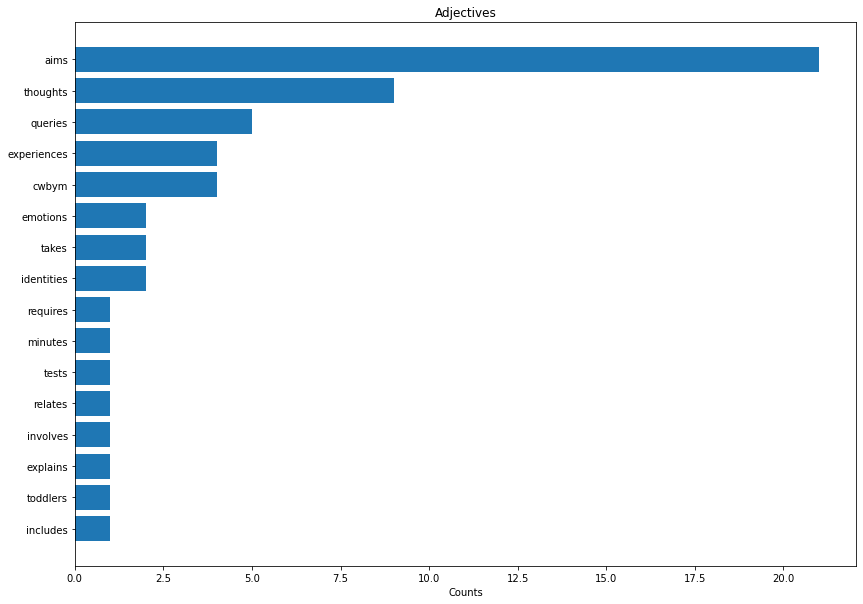

In [178]:
VBZ = sortedTargetsVBZ[:20]

ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(14, 10))

ax.invert_yaxis() 
ax.set_xlabel('Counts')
ax.set_title('Adjectives')


plt.barh(*zip(*VBZ))